In [1]:
import pandas as pd
data=pd.read_csv("jobs.csv",encoding='latin1')
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI â Environmental Systems Re...,"EDUCATION:Â Bachelorâs or Masterâs in GIS,...",Our culture is anything but corporateâwe hav...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [2]:
data.shape

(17880, 18)

In [3]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [4]:
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [5]:
# Let us remove the columns which are not necessary
# axis =1 specifies that the values are column value and inplace=true to make these changes permanent (ie. make these dropes of columns permanent in the data set)
# We have droped salary range because 70% approx null value
# also job_id and other irrelvent columns because they does not have any logical meaning
data.drop(['job_id', 'salary_range', 'telecommuting', 'has_company_logo', 'has_questions'],axis=1,inplace = True)

In [6]:
print(data.shape)
print(data.head())

(17880, 13)
                                       title            location department  \
0                           Marketing Intern    US, NY, New York  Marketing   
1  Customer Service - Cloud Video Production      NZ, , Auckland    Success   
2    Commissioning Machinery Assistant (CMA)       US, IA, Wever        NaN   
3          Account Executive - Washington DC  US, DC, Washington      Sales   
4                        Bill Review Manager  US, FL, Fort Worth        NaN   

                                     company_profile  \
0  We're Food52, and we've created a groundbreaki...   
1  90 Seconds, the worlds Cloud Video Production ...   
2  Valor Services provides Workforce Solutions th...   
3  Our passion for improving quality of life thro...   
4  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our c

In [7]:
data.fillna(' ', inplace=True)

In [8]:
#Create independent and Dependent Features
import numpy as np
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["fraudulent"]]
# Store the variable we are predicting 
target = "fraudulent"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data["fraudulent"]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X, Y)

df1 = pd.DataFrame(X_res)
  
df3 = pd.DataFrame(y_res)
  
# the default behaviour is join='outer'
# inner join
  
result = pd.concat([df1, df3], axis=1, join='inner')
display(result)
data=result;

(17880, 12)
(17880,)


,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
10063,CDL Driver-Omaha,"US, NE, Omaha",,"ABC Supply Co., Inc. is the nationâs largest...","As a Delivery Driver, you will operate your tr...","As a Delivery Driver, you must be focused on s...","As a Delivery Driver, you will receive on-the-...",Full-time,,,Building Materials,,0
103,Customer Service Associate - Part Time,"US, NY, New York",,"Novitex Enterprise Solutions, formerly Pitney ...",Â The Customer Service Associate will be based...,Minimum Requirements:Minimum of 6 months custo...,,Full-time,Entry level,High School or equivalent,Financial Services,Customer Service,0
2592,Web / UX Designer - Full-time or Freelance,"US, CA, San Diego",,Embarke is increasing email opens and clicks f...,ABOUT EMBARKEEmbarke is increasing email opens...,"Experience in design, user experience, and cod...",Learn more about us here.ValuesÂ â Our cultu...,,,,,,0
14009,"SENIOR BUSINESS MANAGEMENT CONSULTANT, London","GB, LND, London",,,"SENIOR BUSINESS MANAGEMENT CONSULTANT, LondonÂ...","""BIG Four"" experience.Your Profile:Â In partic...",DOE,,,,,,0
1567,Travel Consultant Ferries (Temporary - 4 months),"GR, I, Athens",,,As a travel consultant you will be responsible...,- 2-3 years prior working expererience in trav...,"- Gross salary ~ 1,000 EUR/month based on skil...",,,,,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17827,Student Positions Part-Time and Full-Time.,"US, CA, Los Angeles",,,Student Positions Part-Time and Full-Time.You ...,,,Part-time,,,,,1
17828,Sales Associate,"AU, NSW, Sydney",Sales and Marketing,,LEARN TO EARN AN EXECUTIVE LEVEL INCOMEFULL TR...,What You Can Do.Â â¢ Have the potential to ea...,Who We AreÂ We are a Global Leadership Develop...,,,,,,1
17829,Android Developer,"PL, MZ, Warsaw",,,inFullMobile Sp. z o.o. is a mobile software d...,â¢ A proven track record in Android / JAVA pr...,attractive salary (adequate to the candidate s...,,,,,,1
17830,Payroll Clerk,"US, NY, New York",,,JOB DESCRIPTIONWe are seeking a full time payr...,JOB REQUIREMENTSâ¢Â Â Â High school diploma ...,We offer a competitive salary and benefits pac...,Full-time,,,Apparel & Fashion,Accounting/Auditing,1


In [9]:
data.isnull().sum()
# data cleaning done

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

# Explaratory Data Analysis

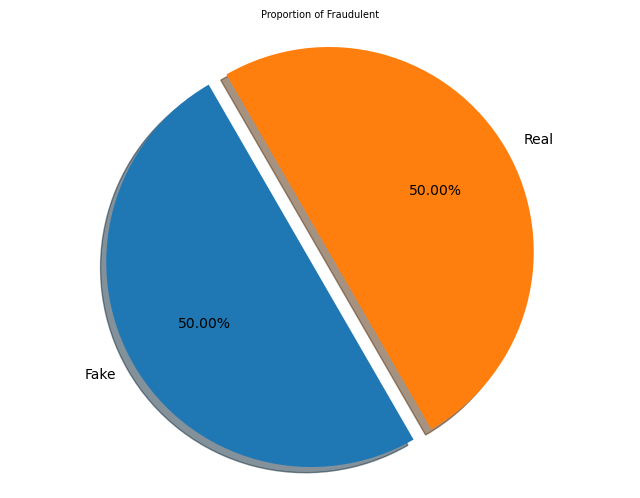

In [10]:
 # Checking for distribution of class label(percentages belonging to real class and percentages belonging to fraud class)
 # in the data 1 indicates fraud post
 # 0 indicating real post
 # Plotting pie chart for the data
 # function of Explode function: how the portion will appear (to understand change explode=(0,0.5))
import matplotlib.pyplot as plt
labels = 'Fake', 'Real'
sizes = [data.fraudulent[data['fraudulent']== 1].count(), data.fraudulent[data['fraudulent']== 0].count()]
explode = (0, 0.1) 
fig1, ax1 = plt.subplots(figsize=(8, 6)) #size of the pie chart
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=120) #autopct %1.2f%% for 2 digit precision
ax1.axis('equal')
plt.title("Proportion of Fraudulent", size = 7)
plt.show() 

In [11]:
# we will try to see which country is posting most of the jobs
# Visualize job postings by countries
# we will use the location column for visualizing this data
# In location data is of type (country_name,state,city)
# we neeed to know the country wise data

def split(location):
    l = location.split(',')
    return l[0]

data['country'] = data.location.apply(split)
data['country']

10063    US
103      US
2592     US
14009    GB
1567     GR
         ..
17827    US
17828    AU
17829    PL
17830    US
17831    US
Name: country, Length: 1732, dtype: object

Text(0.5, 0, 'Countries')

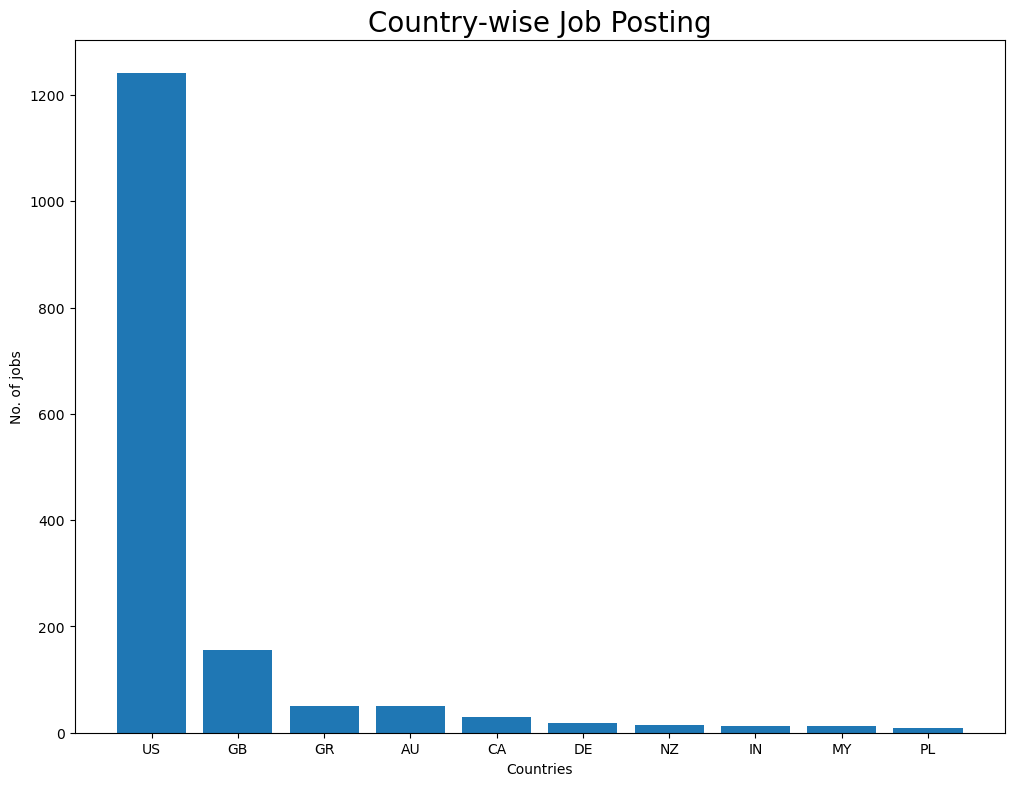

In [12]:
# creating a dictionary(key-value pair) with top 10 country
country = dict(data.country.value_counts()[:11])
del country[' '] #deleting country with space values
plt.figure(figsize=(12,9))
plt.title('Country-wise Job Posting', size=20)
plt.bar(country.keys(), country.values()) #(xaxis,yaxis)
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)

In [13]:
country.keys()

dict_keys(['US', 'GB', 'GR', 'AU', 'CA', 'DE', 'NZ', 'IN', 'MY', 'PL'])

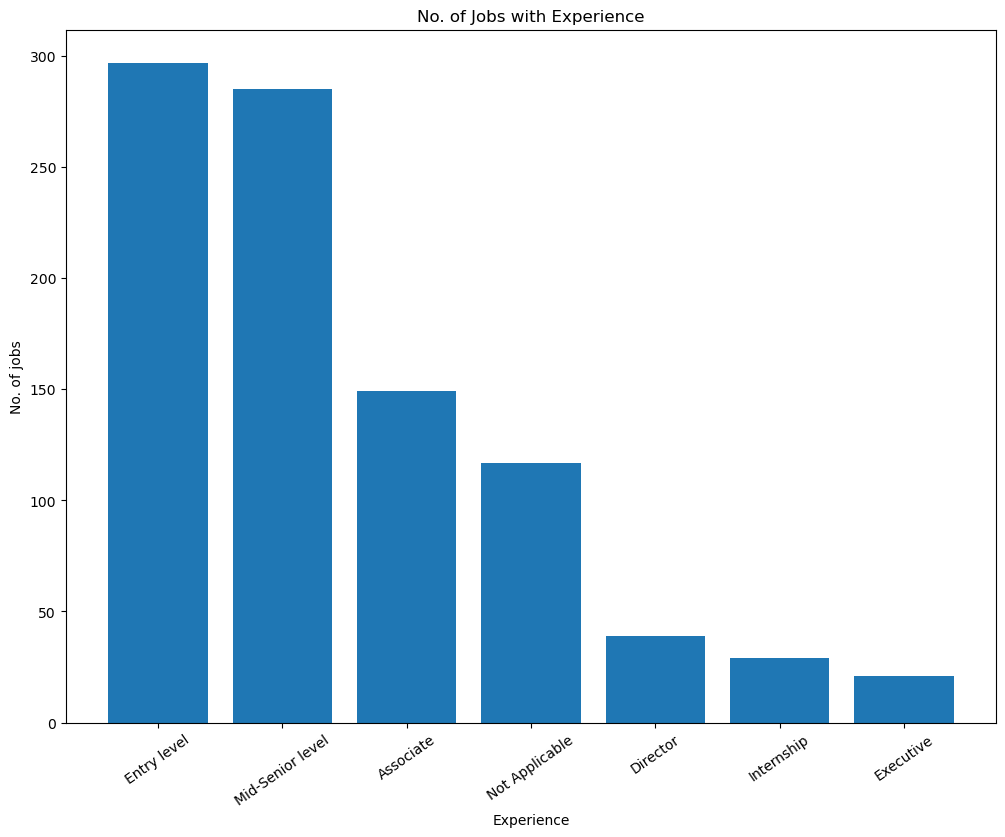

In [14]:
# visualizing jobs based on experience
experience = dict(data.required_experience.value_counts())
del experience[' ']
plt.figure(figsize=(12,9))
plt.bar(experience.keys(), experience.values())
plt.title('No. of Jobs with Experience')
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()

In [15]:
# Task: This data is Inbalanced, it contains 95% of real jobs and only 5% fake jobs,but we can make it balance
# Try this out

In [16]:
#Most frequent jobs
print(data.title.value_counts()[:10])

title
English Teacher Abroad                                                  22
Cruise Staff Wanted *URGENT*                                            21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Data Entry Admin/Clerical Positions - Work From Home                    21
Customer Service Representative                                         18
Administrative Assistant                                                18
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Network Marketing                                                       10
Account Sales Managers $80-$130,000/yr                                  10
Name: count, dtype: int64


In [17]:
#Titles and count of fraudulent jobs
# checking for most fake jobs based on title
print(data[data.fraudulent==1].title.value_counts()[:10])

title
Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: count, dtype: int64


In [18]:


# For textual type data we will try to create word cloud 
# but before that we will try to create text combining all the data present in
# our database.
data['text'] = data['title']+' '+data['location']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']+' '+data['industry']

del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']
del data['country']
del data['employment_type']

In [19]:
data.head()

,fraudulent,text
10063,0,"CDL Driver-Omaha US, NE, Omaha ABC Supply Co.,..."
103,0,"Customer Service Associate - Part Time US, NY,..."
2592,0,"Web / UX Designer - Full-time or Freelance US,..."
14009,0,"SENIOR BUSINESS MANAGEMENT CONSULTANT, London ..."
1567,0,Travel Consultant Ferries (Temporary - 4 month...


**Understanding the common words used in the texts : Wordcloud**

In [20]:
!pip install wordcloud

In [21]:
# we will plot 3 kind of word cloud
# 1st we will visualize all the words our data using the wordcloud plot
# 2nd we will visualize common words in real job posting
# 3rd we will visualize common words in fraud job posting
# join function is a core python function
from wordcloud import WordCloud
all_words = ''.join([text for text in data["text"]]) 

In [22]:
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(all_words)

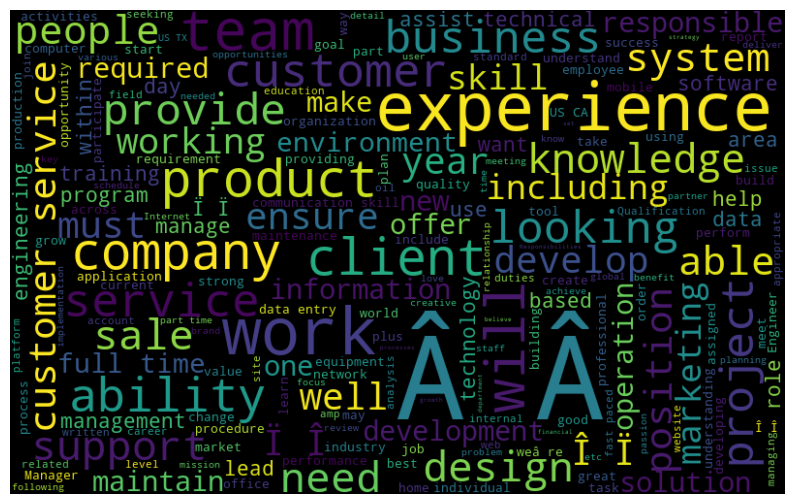

In [23]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
 # Common words in real job posting texts

real_post = ''.join([text for text in data["text"][data['fraudulent']==0]])
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(real_post)


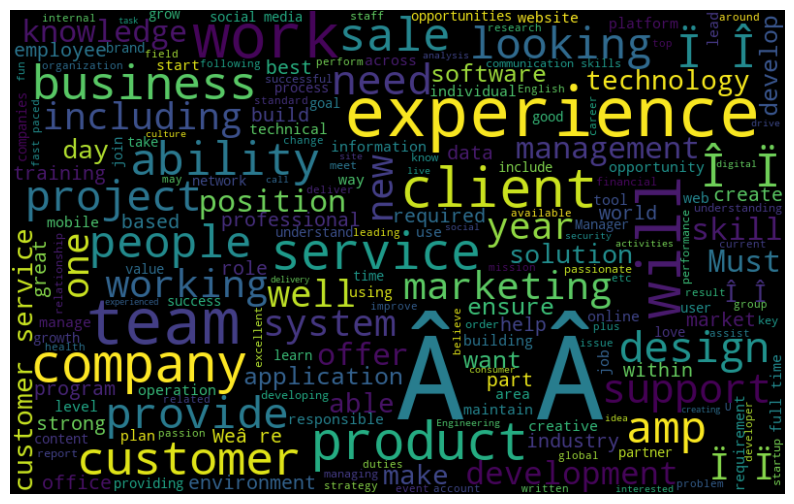

In [25]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
# Common words in fraud job posting texts

fraud_post = ''.join([text for text in data["text"][data['fraudulent'] == 1]])

In [27]:
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(fraud_post)

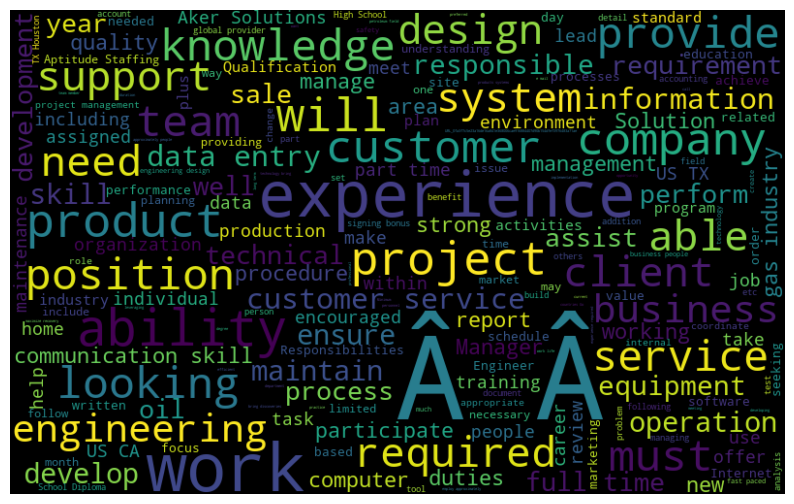

In [28]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Data *Preapration*

In [29]:
# NLTK :: Natural Language Toolkit
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [30]:
print(stopwords.words("english"))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [31]:
#loading the stopwords
stop_words = set(stopwords.words("english"))

In [32]:
#converting all the text to lower case
data['text'] = data['text'].apply(lambda x:x.lower())

In [33]:
#removing the stop words from the corpus
data['text'] = data['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))

In [34]:
data['text']

10063    cdl driver-omaha us, ne, omaha abc supply co.,...
103      customer service associate - part time us, ny,...
2592     web / ux designer - full-time freelance us, ca...
14009    senior business management consultant, london ...
1567     travel consultant ferries (temporary - 4 month...
                               ...                        
17827    student positions part-time full-time. us, ca,...
17828    sales associate au, nsw, sydney learn earn exe...
17829    android developer pl, mz, warsaw infullmobile ...
17830    payroll clerk us, ny, new york job description...
17831    furniture mover us, il, chicago anthony warren...
Name: text, Length: 1732, dtype: object

In [35]:
from sklearn.model_selection import train_test_split
# Splitting dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(data.text, data.fraudulent, test_size=0.3)

In [36]:
# what does X-train and y_train contain
print(y_train)
print(X_train)


6333     1
812      1
8439     0
5506     1
13103    0
        ..
5635     0
17787    1
10649    0
11727    1
9816     0
Name: fraudulent, Length: 1212, dtype: int64
6333     sales professional- mid market us, md, baltimo...
812      ust testing technician ii us, ca, bakersfield ...
8439     venture analyst gb, , london sustainable ventu...
5506     home based payroll data entry clerk position -...
13103    visual designer gb, lnd, london acknowledgemen...
                               ...                        
5635     web developer br, rs, santa maria looking stud...
17787    cash paying vacancies (apply today) us, ca, lo...
10649    junior account manager gr, i, athens atcom wor...
11727    information security manager us, ca, san mateo...
9816     senior functional analyst lu, , luxembourg eur...
Name: text, Length: 1212, dtype: object


In [37]:
# The model cannot operate text data so we need to convert our data into vector format
# we will be using Bag of words model 
from sklearn.feature_extraction.text import CountVectorizer

#  instantiate the vectorizer
vect = CountVectorizer()

# learn training data vocabulary, then use it to create a document-term matrix
# fit
vect.fit(X_train)

# transform training data
X_train_dtm = vect.transform(X_train)


In [38]:
# examine the document-term matrix
X_train_dtm

#how X_train_dtm is looking
print(X_train_dtm)
# This is Matrix representation,non 0 valued cells are not printed

  (0, 61)	1
  (0, 331)	1
  (0, 1179)	1
  (0, 1194)	1
  (0, 1254)	1
  (0, 2118)	1
  (0, 2320)	1
  (0, 2679)	1
  (0, 3357)	1
  (0, 3367)	1
  (0, 3535)	2
  (0, 3536)	1
  (0, 3935)	1
  (0, 3964)	2
  (0, 4050)	1
  (0, 4605)	1
  (0, 4944)	1
  (0, 5107)	1
  (0, 5388)	1
  (0, 5458)	1
  (0, 5495)	1
  (0, 5789)	1
  (0, 5887)	1
  (0, 6097)	1
  (0, 6749)	1
  :	:
  (1211, 19183)	1
  (1211, 19242)	4
  (1211, 19318)	1
  (1211, 19338)	1
  (1211, 19656)	2
  (1211, 19712)	2
  (1211, 19734)	1
  (1211, 19746)	2
  (1211, 19797)	1
  (1211, 19798)	1
  (1211, 19816)	1
  (1211, 19829)	1
  (1211, 19859)	1
  (1211, 20027)	1
  (1211, 20232)	1
  (1211, 20244)	1
  (1211, 20495)	1
  (1211, 20520)	1
  (1211, 20563)	1
  (1211, 20604)	1
  (1211, 20665)	1
  (1211, 20673)	1
  (1211, 20693)	3
  (1211, 20726)	1
  (1211, 20733)	1


In [39]:
# PCA is not advisable for a NLP task,because PCA is for 
# principal feature extraction and in this case we already have features

In [40]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<520x20925 sparse matrix of type '<class 'numpy.int64'>'
	with 80212 stored elements in Compressed Sparse Row format>

# Model Building & evaluation

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

<h2>Naive Bayes</h2>

In [42]:
# Naive Bayes Classifier
# we are using Multinomial Naive Bayes approach because the data here is not symmetrical.
# generally if there are data in the form of this long text,it is advisable to 
# %time will give the time taken by the system for execution
nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)

CPU times: total: 15.6 ms
Wall time: 16.4 ms


MultinomialNB()

In [43]:
y_pred_nb = nb.predict(X_test_dtm)
print(y_pred_nb)

[0 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0
 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1
 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1
 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0
 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1
 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1
 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0
 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0
 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0
 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1
 1 0 1 1 0 0 1 0 0 0 1 0 

Classification Accuracy: 0.8788461538461538
Classification Report

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       288
           1       0.87      0.86      0.86       232

    accuracy                           0.88       520
   macro avg       0.88      0.88      0.88       520
weighted avg       0.88      0.88      0.88       520

Confusion Matrix

[[257  31]
 [ 32 200]]


Text(95.72222222222221, 0.5, 'Truth')

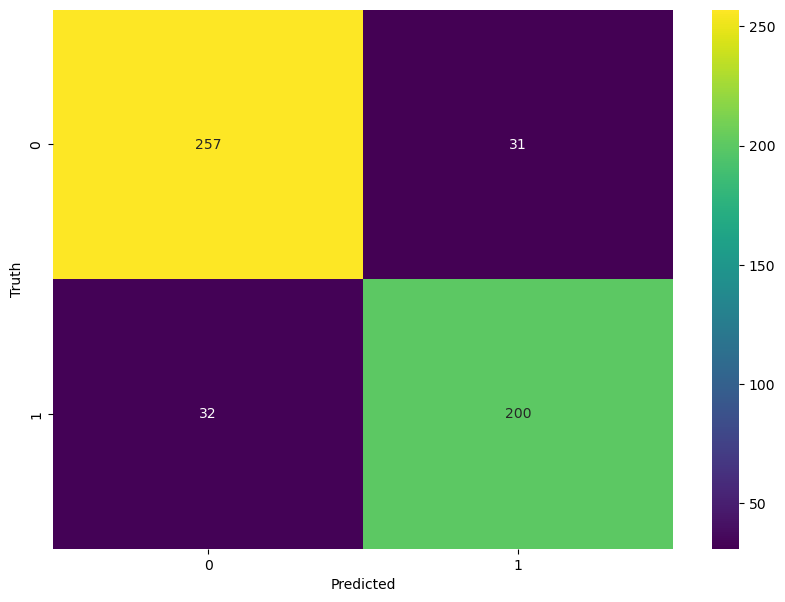

In [44]:
accuracy_score(y_test, y_pred_nb)
print("Classification Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report\n")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_nb))

import seaborn as sns
cm = confusion_matrix(y_test,y_pred_nb)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d',cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h2>Decision Tree Classifier</h2>

In [45]:
#instantiate a Decision Tree Classifier
dt = DecisionTreeClassifier()

In [46]:
#train the model363
# using X_train_dtm (timing it with an IPython "magic command")

%time dt.fit(X_train_dtm, y_train)

CPU times: total: 578 ms
Wall time: 795 ms


DecisionTreeClassifier()

In [47]:
# make class predictions for X_test_dtm
y_pred_class = dt.predict(X_test_dtm)

In [48]:
# Model Accuracy
print("Classification Accuracy:", accuracy_score(y_test, y_pred_class))
print("Classification Report\n")
print(classification_report(y_test, y_pred_class))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_class))



Classification Accuracy: 0.8461538461538461
Classification Report

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       288
           1       0.81      0.85      0.83       232

    accuracy                           0.85       520
   macro avg       0.84      0.85      0.85       520
weighted avg       0.85      0.85      0.85       520

Confusion Matrix

[[242  46]
 [ 34 198]]


Text(95.72222222222221, 0.5, 'Truth')

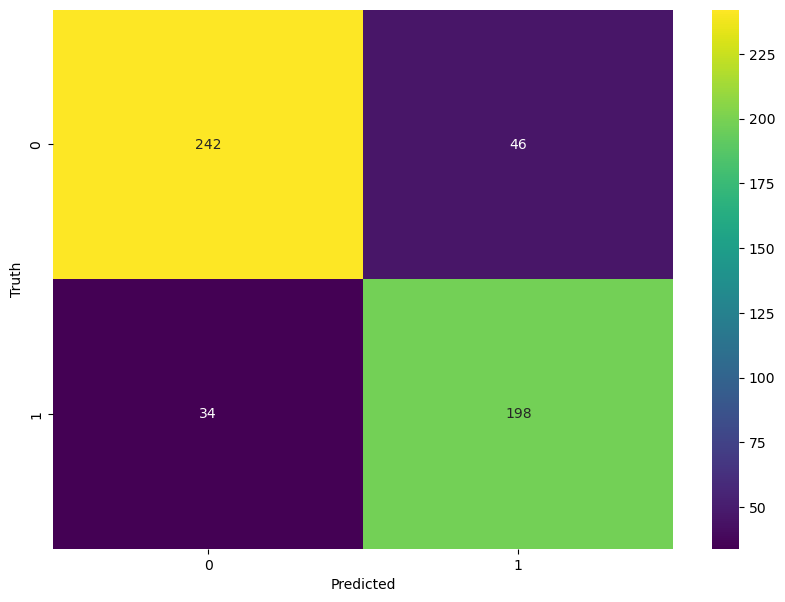

In [49]:
# Confusion Matrix

import seaborn as sns
cm = confusion_matrix(y_test,y_pred_class)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d',cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Building a Predictive System

In [50]:
#Lets Predict for a data set
X_test

708      customer service associate - part time us, il,...
1272     reliability engineer - sap - detroit, mi us, m...
5585     urgently required system administrator bahrain...
997      executive sous chef my, , le meridien situated...
14096    document controller choose aecom? imagine work...
                               ...                        
12745    enterprise sales manager gb, lnd, london adthe...
17399    weekly jobs, part time workers required. au, n...
17408    manufacturing engineer us, ca, san francisco c...
1700     cruise staff wanted *urgent* us, ny, manhattan...
17765    data entry admin/clerical positions - work hom...
Name: text, Length: 520, dtype: object

In [51]:
print(X_test[708])

customer service associate - part time us, il, chicago novitex enterprise solutions, formerly pitney bowes management services, delivers innovative document communications management solutions help companies around world drive business process efficiencies, increase productivity, reduce costs improve customer satisfaction. almost 30 years, clients turned us integrate optimize enterprise-wide business processes empower employees, increase productivity maximize results. trusted partner, continually focus delivering secure, technology-enabled document communications solutions improve clients' work processes, enhance customer interactions drive growth. customer service associate based chicago, il. right candidate integral part talented team, supporting continued growth.responsibilities:hospitalityset straighten conference rooms throughout day.check conference rooms &amp; open meeting areascheck tables repair cleanlinesscheck chairs repairs stainsclean white boards/idea wallscheck supplies,

In [53]:
input_text=["customer service associate - part time us, il, chicago novitex enterprise solutions, formerly pitney bowes management services, delivers innovative document communications management solutions help companies around world drive business process efficiencies, increase productivity, reduce costs improve customer satisfaction. almost 30 years, clients turned us integrate optimize enterprise-wide business processes empower employees, increase productivity maximize results. trusted partner, continually focus delivering secure, technology-enabled document communications solutions improve clients' work processes, enhance customer interactions drive growth. customer service associate based chicago, il. right candidate integral part talented team, supporting continued growth.responsibilities:hospitalityset straighten conference rooms throughout day.check conference rooms &amp; open meeting areascheck tables repair cleanlinesscheck chairs repairs stainsclean white boards/idea wallscheck supplies, (markers, liquid bottles cloths)assist inquires requestedmake coffee throughout daystock kitchen supplies throughout day, ( coffee, filters, creamers, sugar, stirs, cups, paper towels, dishwashing liquid, spongesback-up receptionist: requestedback-up areas (mailroom) neededperform various mail center activities (sorting, metering, folding, inserting, delivery, pickup, etc.)lift heavy boxes, files paper needed minimum requirements:minimum 6 months customer service related experience requiredâ excellent communication skills verbal writtenâ ability effectively work individually team environmentâ competency performing multiple functional tasksâ ability meet employer's attendance policyâ basic pc/windows experience requiredâ ability lift and/or move items maximum 50lbs. maximum allowed current state law without accommodationsability stand, sit walk long periods time without accommodationsflexibility work schedule requiredpreferred qualifications:minimum 6 months experience mail center environment consumer goods"]

In [54]:
# convert text to feature vectors
input_data_features = vect.transform(input_text)

# making prediction

prediction = dt.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Fraudulant Job')

else:
  print('Real Job')

[0]
Real Job


In [56]:
#Lets check wether predicted result was correct or not
print(y_test[708])

0


Thus the predicted result was correct.